## MMC - L4 - Kacper Marchlewicz - 310195

# Zadanie 3
Celem zadania jest porównanie metod szacowania całek. W zadaniu szacowana będzie wartość całki sinusa na przedziale (0, pi/2), kóra analitycznie równa jest 1. Pierwszą metodą będzie metoda postawowa Monte Carlo:

In [6]:
import numpy as np
import math
from matplotlib import pyplot as plt

def f(x):
    return np.sin(x)

def mc_basic(f, a, b, N):
    nums = np.random.uniform(a, b, N)
    # całka
    y = [f(num) for num in nums]
    y_m = np.sum(y)/N
    I_method = abs(a-b)*y_m
    # błąd całki (rzeczywista dla założeń wynosi 1)
    error = abs(I_method - 1)
    # odchylenie standardowe
    std_J = 1/np.sqrt((N*(N-1))) * np.sqrt( np.sum(np.square(y)) - (1/N)*np.square(np.sum(y)) )
    std_I = abs(a-b)*std_J
    # niepewność
    uncertain = 2*std_I
    return I_method, error, std_I, uncertain

Drugą metodą liczenia całki jest zamiana zmiennych:

In [7]:
def mc_basic_swap(f, a, b, N):
    # x = sqrt(z) czyli z = square(x)
    z_min = np.square(a)
    z_max = np.square(b)
    # generacja liczb
    nums = np.random.uniform(z_min, z_max, N)
    # całka
    y = y = f(np.sqrt(nums))/(2*np.sqrt(nums))
    y_m = np.sum(y)/N
    I_method = abs(z_min-z_max)*y_m
    # błąd całki (rzeczywista dla założeń wynosi 1)
    error = abs(I_method - 1)
    # odchylenie standardowe
    std_J = 1/np.sqrt((N*(N-1))) * np.sqrt( np.sum(np.square(y)) - (1/N)*np.square(np.sum(y)) )
    std_I = abs(z_min-z_max)*std_J
    # niepewność
    uncertain = 2*std_I
    return I_method, error, std_I, uncertain

Należy przedstawić na wspólnym wykresie zależność niepewności oraz błędu od liczności próby dla „zwykłego” całkowania MC oraz całkowania z użyciem zamiany zmiennych.

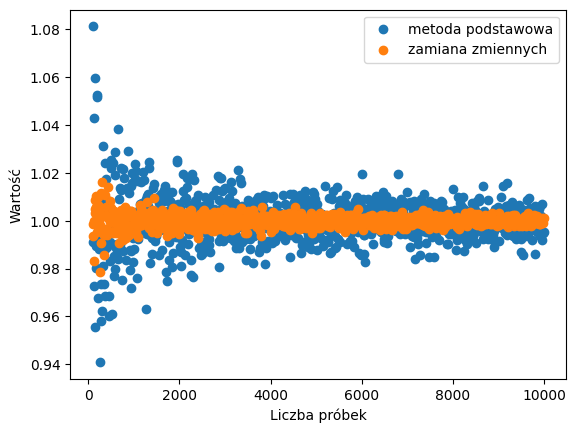

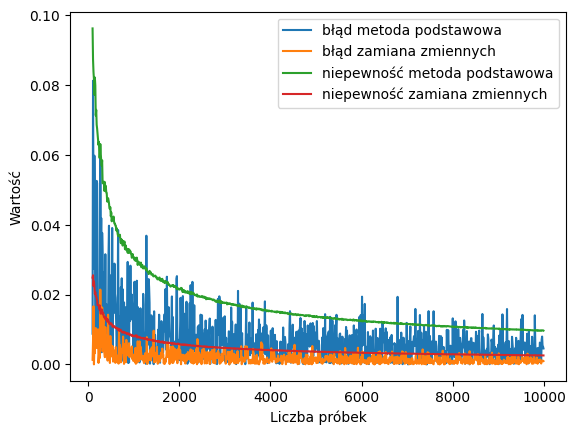

In [8]:
N = 100
a = 0
b = math.pi/2
I_values = list()
I_values_swap = list()
uncertains = list()
uncertains_swap = list()
errors = list()
errors_swap = list()
N_list = list()
while (N<10000):
    I_method, error, std_I, uncertain = mc_basic(f, a, b, N)
    I_method_swap, error_swap, std_I_swap, uncertain_swap = mc_basic_swap(f, a, b, N)

    I_values.append(I_method)
    I_values_swap .append(I_method_swap)
    uncertains.append(uncertain)
    uncertains_swap.append(uncertain_swap)
    errors.append(error)
    errors_swap.append(error_swap)
    N_list.append(N)
    N+=10
plt.scatter(N_list, I_values, label='metoda podstawowa')
plt.scatter(N_list, I_values_swap, label='zamiana zmiennych')
plt.ylabel('Wartość')
plt.xlabel('Liczba próbek')
plt.legend(loc='best')
plt.show()

plt.plot(N_list, errors, label='błąd metoda podstawowa')
plt.plot(N_list, errors_swap, label='błąd zamiana zmiennych')
plt.plot(N_list, uncertains, label='niepewność metoda podstawowa')
plt.plot(N_list, uncertains_swap, label='niepewność zamiana zmiennych')
plt.ylabel('Wartość')
plt.xlabel('Liczba próbek')
plt.legend(loc='best')
plt.show()

Metoda zamianny zmiennych przyniosła poprawę w stosunku do metody podstawowej. Widać znaczne zmiany na wykresie pokazującym szacowane wartości całki. Na drugim wykresie mozna zobaczyć spadek wartości błędu i niepewności.

# Zadanie 7
Celem tego zadania jest porównanie próbkowania pseudolosowego i quasilosowego w całkowaniu. W zadaniu szacowana będzie wartość całki sinusa na przedziale (0, pi), kóra analitycznie równa jest 2. Wykorzystywana bedzie metoda orzeł-reszka z losowaniem licz pseudolosowych lub quasilosowych.

In [9]:
import random 
import math
import numpy as np
from scipy.stats import qmc
from matplotlib import pyplot as plt

def f(x):
    return math.sin(x)

sobol = qmc.Sobol(d=2, scramble=False, seed=1)

def head_tails(f, a, b, n, quasi, use_quasi=False):
    heads = 0
    for _ in range(n):
        if use_quasi is True:
            x, y = qmc.scale(quasi.random(1), [a, 0.0], [b, 1.0])[0]
        else:
            x = random.uniform(a, b)
            y = random.uniform(0, 1)
        if y <= f(x):
            heads += 1
    est_val = (heads/n)*abs(a - b)
    error = abs(est_val - 2)
    return est_val, error

Następnie porównano działanie metody zależnie od używanego generatora: 

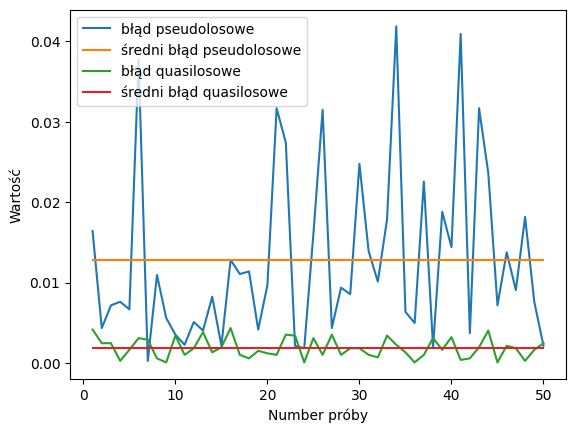

In [10]:
a = 0
b = math.pi
n = 10000
experiment_num = 50
error_list = list()
error_list_quasi = list()
for _ in range(experiment_num):
    est_val, error = head_tails(f, a, b, n, sobol)
    error_list.append(error)
    est_val_quasi, error_quasi = head_tails(f, a, b, n, sobol, use_quasi=True)
    error_list_quasi.append(error_quasi)

plt.plot(np.linspace(1, experiment_num,  experiment_num), error_list, label='błąd pseudolosowe')
plt.plot(np.linspace(1, experiment_num,  experiment_num), np.linspace(1, 1, experiment_num)*sum(error_list)/experiment_num, label='średni błąd pseudolosowe')
plt.plot(np.linspace(1, experiment_num,  experiment_num), error_list_quasi, label='błąd quasilosowe')
plt.plot(np.linspace(1, experiment_num,  experiment_num), np.linspace(1, 1, experiment_num)*sum(error_list_quasi)/experiment_num, label='średni błąd quasilosowe')
plt.xlabel('Number próby')
plt.ylabel('Wartość')
plt.legend(loc='best')
plt.show()

Jak można powyżej zaobserowować, błędy szacowania są znacznie niższe dla liczb quasilosowych. Wynika to z tego, że punkty generowane przez generator Sobola udają liczby losowe, gdyby wykreślić je w układzie współrzędnych to można by zauważyć regularny kształt. Deterministyczna natura liczb quasilosowych wpływa na równomierny rozkład generowanych punktów, dzięki czemu uzyskiwana jest niższa wartość błędu.